Homework Group A
## Osama Al Kamel / Mtr Num: 3141575
## Joshua Oldridge / Mtr Num: 3140770
---

# Introduction to Computer Vision - Exercise
---
We will once more use DALL-E generated images, starting with the one we already saw in the lecture material. Instructions for the individual tasks are given in <span style="color:blue">blue</span> color.

---

## Overview
  - [Grayscale Conversion](#Grayscale-Conversion)
  - [Corner detection](#Corner-detection)
- [Object detection](#Object-detection)
  - [Comparing face detectors](#Comparing-face-detectors)
  - [Comparing upper body detectors](#Comparing-upper-body-detectors)
  - [Critical assessment of detectors](#Critical-assessment-of-detectors)

---

In [226]:
# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
# default size of figures
plt.rcParams['figure.figsize'] = [6, 6]

# we will use imgstr, which makes it easy to use different images
imgstr = 'img/fabel.jpg'

### Grayscale Conversion

We have seen that while we can do the necessary color conversions by hand, there are also built-in OpenCV functions to achieve this. Let us now do both for grayscale.

<div style="color:blue">Let's get started with a little conversion task.</div>

1. <div style="color:blue">Read the input image and obtain the individual channels.</div>
1. <div style="color:blue">Manually create a grayscale image based on the channels.</div>
1. <div style="color:blue">Use the built-in OpenCV funtion to produce a second grayscale image.</div>
1. <div style="color:blue">Display the images side by side, saying which is which.</div>
1. <div style="color:blue">Optionally also display the difference map between the two grascale images.</div>

**Hints**: 
* Check the formula for color conversions [here](https://docs.opencv.org/4.9.0/de/d25/imgproc_color_conversions.html) for the manual part.
* If you do the optional part, investigate a bit further to get an explanation for what you see.

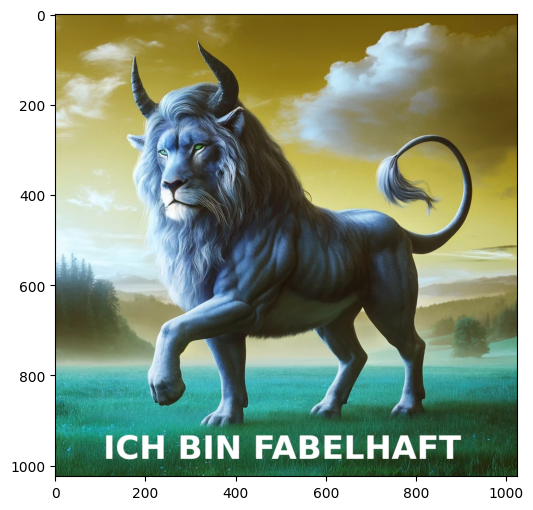

In [227]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)
inputImg = cv2.imread(imgstr)
channels = cv2.split(inputImg)
plt.imshow(inputImg)
plt.show()

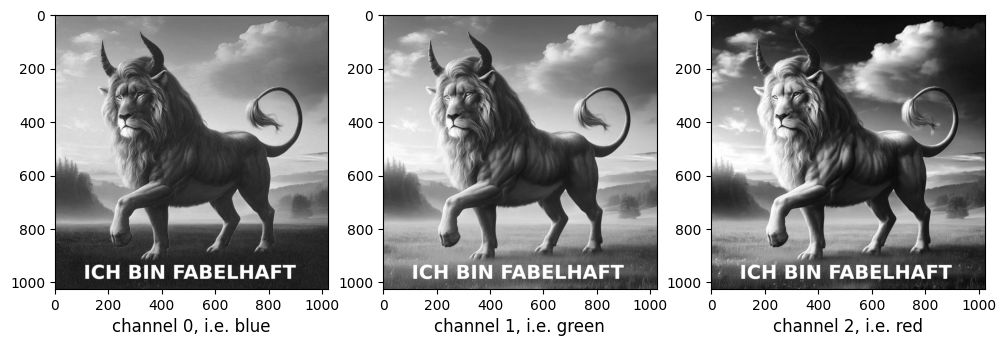

In [228]:
#creating grayscale images
colors = ["blue","green","red"]

with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    for i, (color, channel) in enumerate(zip(colors,channels)):
        ax = fig.add_subplot(1, 3, i+1)
        ax.imshow(channel, cmap='gray')
        ax.set_xlabel(f'channel {i}, i.e. {colors[i]}', size=12)
plt.show()

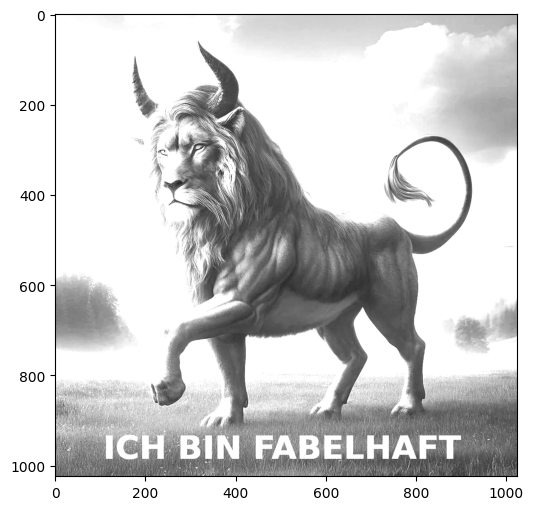

In [229]:
#one image using color channels by adding up all the channels
grayImgChannels = cv2.add(channels[0],channels[1],channels[2])
plt.imshow(grayImgChannels, cmap='gray')
plt.show()

<div style="color:lightblue"> The image we get is way too bright, so we tried getting the weighted sum of the channels instead of just adding them up

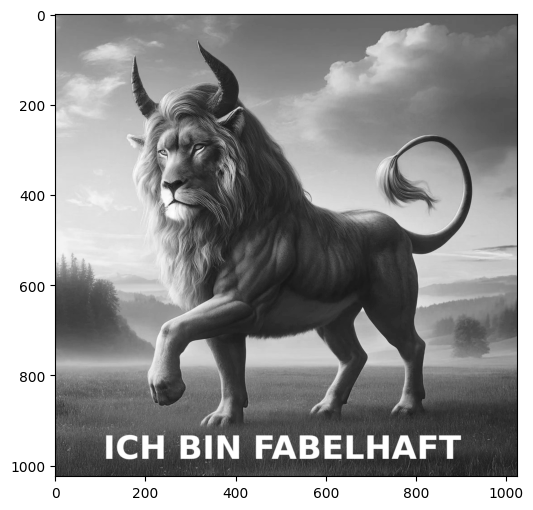

In [230]:
#weighted sum
grayImgChannelsWeighted = cv2.add(channels[0]*(1/3),channels[1]*(1/3),channels[2]*(1/3))

plt.imshow(grayImgChannelsWeighted, cmap='gray')

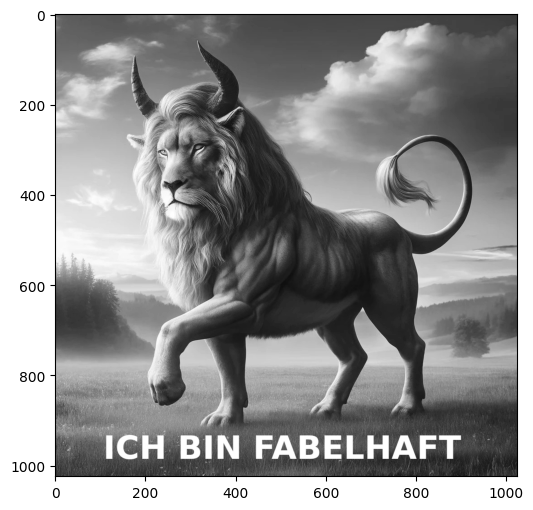

In [231]:
#Displaying gray image open cv
opencvGrayImg = cv2.cvtColor(inputImg, cv2.COLOR_BGR2GRAY)
plt.imshow(opencvGrayImg, cmap='gray')
plt.show()

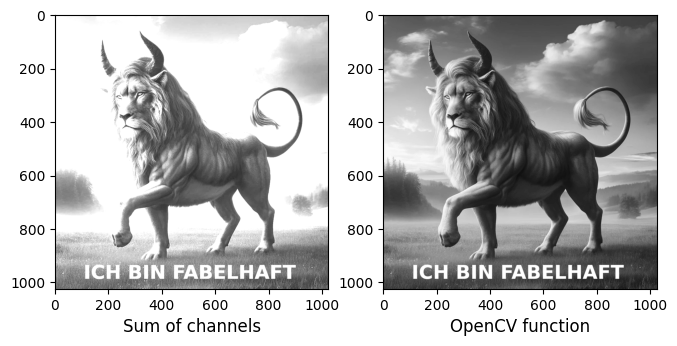

In [232]:
#2 images diplayed (normal sum and opencv function)
with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(grayImgChannels, cmap='gray')
    ax.set_xlabel('Sum of channels', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(opencvGrayImg, cmap='gray')
    ax.set_xlabel('OpenCV function', size=12)
plt.show()

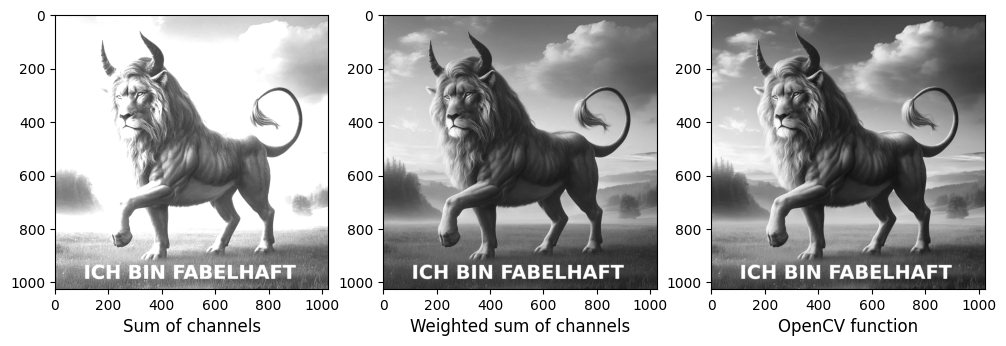

In [233]:
#all images displayed
with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(grayImgChannels, cmap='gray')
    ax.set_xlabel('Sum of channels', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(grayImgChannelsWeighted, cmap='gray')
    ax.set_xlabel('Weighted sum of channels', size=12)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(opencvGrayImg, cmap='gray')
    ax.set_xlabel('OpenCV function', size=12)
plt.show()

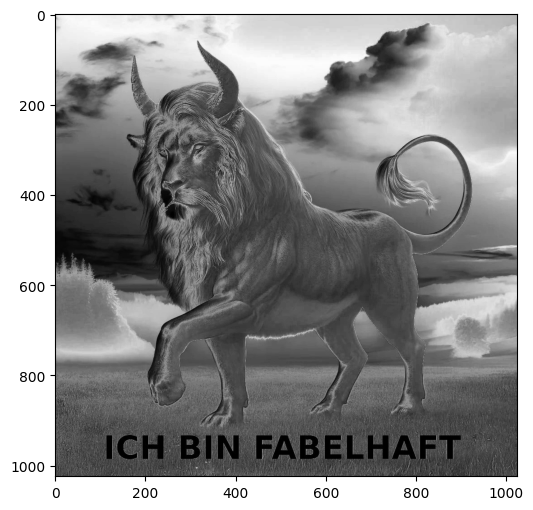

In [234]:
#diffrence map between simple sum and opencv function
diff_map = cv2.absdiff(grayImgChannels, opencvGrayImg)
plt.imshow(diff_map, cmap="gray")

### Corner detection
In the lecture material, we already tried the Harris corner detector.  Here, you should try out a different one and compare the two.

* <div style="color:blue">Use Shi-Tomasi corner detection to find corners in our input image. Compare the result to what the Harris detector finds. Which one do you prefer (and why)?</div>

**Hint:** You can find an example in the [OpenCV tutorials](https://docs.opencv.org/4.9.0/db/d27/tutorial_py_table_of_contents_feature2d.html). Be aware, however, that we want to show the corner points on a color image.

C:\Users\smart\AppData\Local\Temp\ipykernel_31160\649540146.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


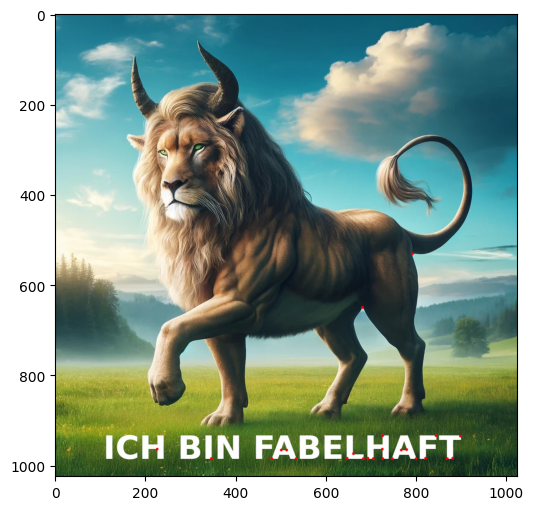

(<matplotlib.image.AxesImage at 0x1eb2317dc90>, None)

In [235]:
# Your solution goes here:
inputImgRGB = cv2.cvtColor(inputImg,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(inputImg,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(inputImgRGB,(x,y),3,255,-1)
plt.imshow(inputImgRGB),plt.show()

*Your answer goes here:*




<div style="color:lightblue"> I would prefer using Harris, as it is able to more accurately detect corners, for example in Shi-Tomasi detected image, it was not able to find all the corners in the letters, which should be pretty easy to detect as theyre clear cut corners, but the Harris detected image was able to find all of them

## Object detection

You will be working with two more images generated by DALL-E - one of people at a party and one of people standing by a lake in a park.

<div>
<img src='img/Fest_gemischt.jpg' alt="People at a party" width=400>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src='img/Personen_im_Park.jpg' alt="People in a park by a lake" width=400>
</div>

Your task will be to try out different Haar cascades, which you will have to find first.

* <div style="color:blue">Find sources for Haar cascades to be used with opencv <b>and</b> provide the links for these.</div>

*Your links go here:* <br>
https://github.com/opencv/opencv/tree/master/data/haarcascades<br>
https://github.com/AlexanderLutsenko/Shape-Detection/blob/master/haarcascades/mcs_upperbody.xml<br>

### Comparing face detectors

Your task is to compare the default face detector to an alternative one and to interpret the results.
* <div style="color:blue">Start by loading the image of people at a party from which you should create a grayscale version and display both side by side</div>
* <div style="color:blue">Use the default face detector as well as an alternative one and compare the results both visually as well as through an assessment.</div>

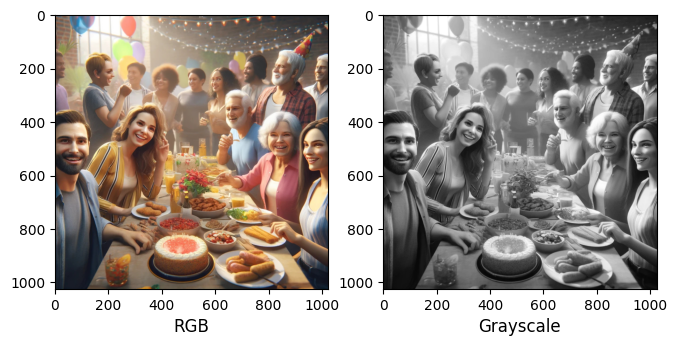

In [236]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)
imgPartyPpl = cv2.imread("img/Fest_gemischt.jpg")
RGBImgPartyPpl = cv2.cvtColor(imgPartyPpl,cv2.COLOR_BGR2RGB)
grayImgPartyPpl = cv2.cvtColor(imgPartyPpl,cv2.COLOR_BGR2GRAY)

with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(RGBImgPartyPpl, cmap='gray')
    ax.set_xlabel('RGB', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(grayImgPartyPpl, cmap='gray')
    ax.set_xlabel('Grayscale', size=12)
    
plt.show()


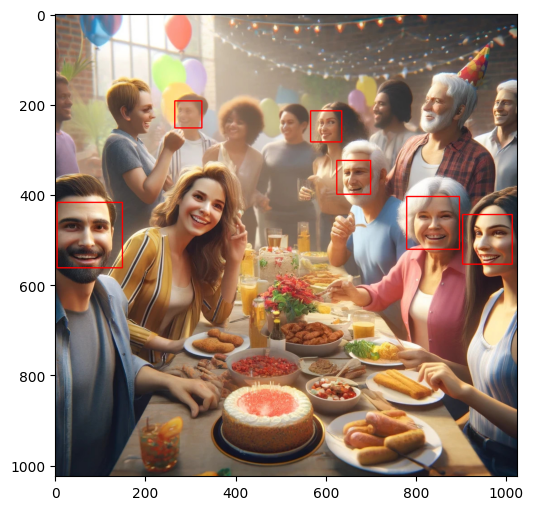

In [237]:
#using the defualt pretrained model
face_box_color = (255,0,0)

DefualtRGBImgPartyPpl = RGBImgPartyPpl.copy()
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grayImgPartyPpl, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(DefualtRGBImgPartyPpl,(x,y),(x+w,y+h),face_box_color,2)
plt.imshow(DefualtRGBImgPartyPpl)
plt.show()

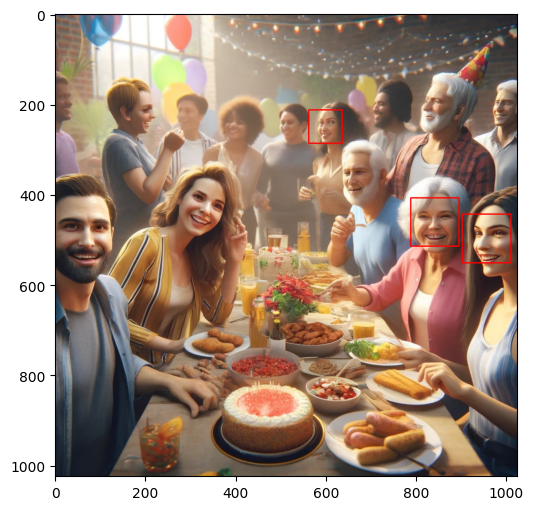

In [238]:
#using the defualt pretrained model
face_box_color = (255,0,0)

AltRGBImgPartyPpl = RGBImgPartyPpl.copy()
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(grayImgPartyPpl, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(AltRGBImgPartyPpl,(x,y),(x+w,y+h),face_box_color,2)
plt.imshow(AltRGBImgPartyPpl)
plt.show()

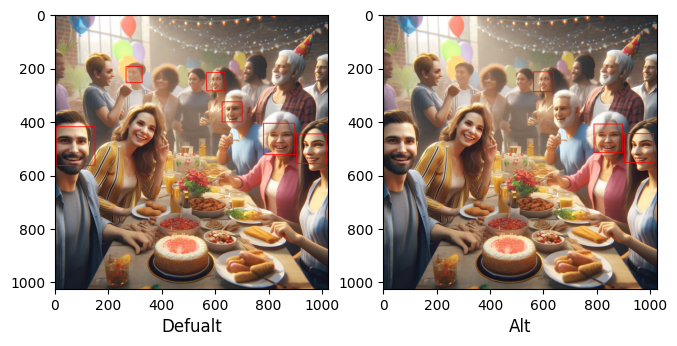

In [239]:
with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(DefualtRGBImgPartyPpl)
    ax.set_xlabel('Defualt', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(AltRGBImgPartyPpl)
    ax.set_xlabel('Alt', size=12)
    
plt.show()

*Your assessment goes here:* 
<div style="color:lightblue"> The defualt face detector is quite a bit better than the alt one, as we can see it was able to detect double the amount of faces as the alt one was able to, so it was able to detect 6, while the alt was only able to detect 3, nevertheless it is still not able to detect all the faces in the image.<br>

We can also play around with the scale factor to get diffrent number of faces detected


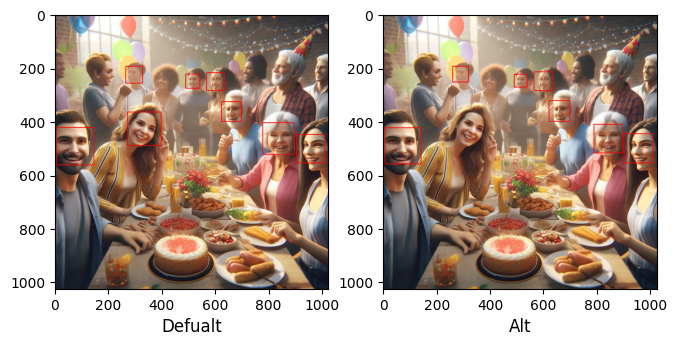

In [240]:
scaleFactor = 1.15

face_box_color = (255,0,0)
DefualtRGBImgPartyPpl = RGBImgPartyPpl.copy()
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grayImgPartyPpl, scaleFactor, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(DefualtRGBImgPartyPpl,(x,y),(x+w,y+h),face_box_color,2)

AltRGBImgPartyPpl = RGBImgPartyPpl.copy()
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(grayImgPartyPpl, scaleFactor, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(AltRGBImgPartyPpl,(x,y),(x+w,y+h),face_box_color,2)

with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(DefualtRGBImgPartyPpl)
    ax.set_xlabel('Defualt', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(AltRGBImgPartyPpl)
    ax.set_xlabel('Alt', size=12)
    
plt.show()

<div style="color:lightblue"> With 1.15 scale factor, both models detect more faces, but the defualt still detected one extra face over the Alt

### Comparing upper body detectors

Your task is to compare the default face detector to an alternative one and to interpret the results.
* <div style="color:blue">Start by loading the image of people at a lake in the park from which you should create a grayscale version and display both side by side</div>
* <div style="color:blue">Use the default upper body detector as well as an alternative one and compare the results both visually as well as through an assessment.</div>

**Hint:** it might take you some time to find an alternative Haar cascade for the upper body, but it might be well worth it (it might make sense to include "Modesto Castrillon-Santana" or "mcs" in your respective searches).

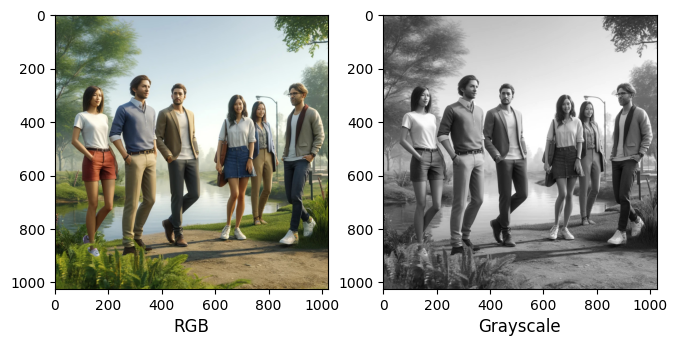

In [241]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)
imgPark = cv2.imread("img\Personen_im_Park.jpg")
RGBImgPark = cv2.cvtColor(imgPark,cv2.COLOR_BGR2RGB)
grayImgPark = cv2.cvtColor(imgPark,cv2.COLOR_BGR2GRAY)

with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(RGBImgPark)
    ax.set_xlabel('RGB', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(grayImgPark, cmap='gray')
    ax.set_xlabel('Grayscale', size=12)
    
plt.show()



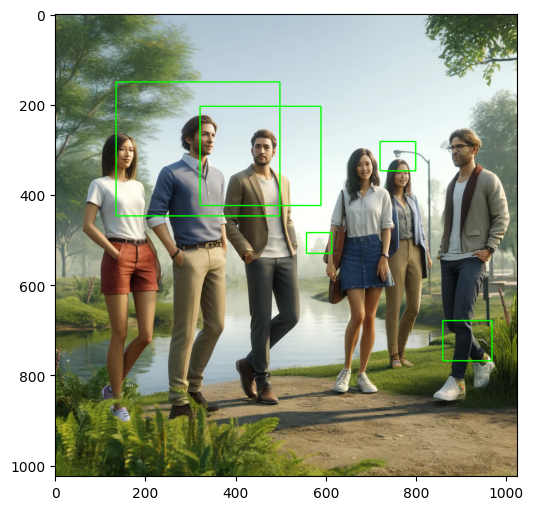

In [242]:
#using the defualt pretrained model
body_box_color = (0,255,0)

DefualtRGBImgPark = RGBImgPark.copy()
body_cascade = cv2.CascadeClassifier('models/haarcascade_upperbody.xml')
bodies = body_cascade.detectMultiScale(grayImgPark, 1.03, 5)   #had to change the scale factor to get a detection
for (x,y,w,h) in bodies:
     cv2.rectangle(DefualtRGBImgPark,(x,y),(x+w,y+h),body_box_color,2)
plt.imshow(DefualtRGBImgPark)
plt.show()

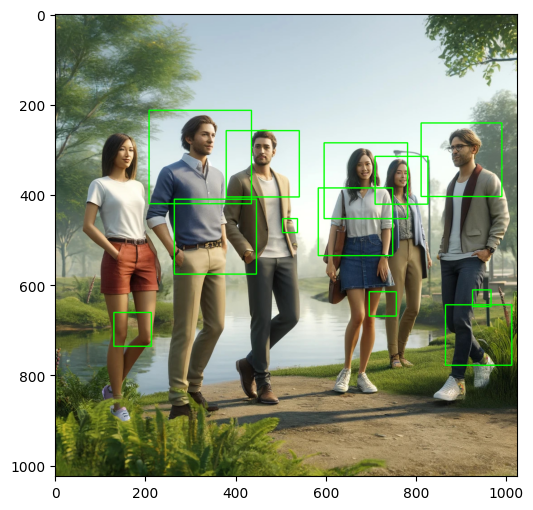

In [244]:
body_box_color = (0,255,0)

mcsRGBImgPark = RGBImgPark.copy()
body_cascade = cv2.CascadeClassifier('models/mcs_upperbody.xml')
bodies = body_cascade.detectMultiScale(grayImgPark, 1.03, 5)   #had to change the scale factor to get a detection
for (x,y,w,h) in bodies:
     cv2.rectangle(mcsRGBImgPark,(x,y),(x+w,y+h),body_box_color,2)
plt.imshow(mcsRGBImgPark)
plt.show()

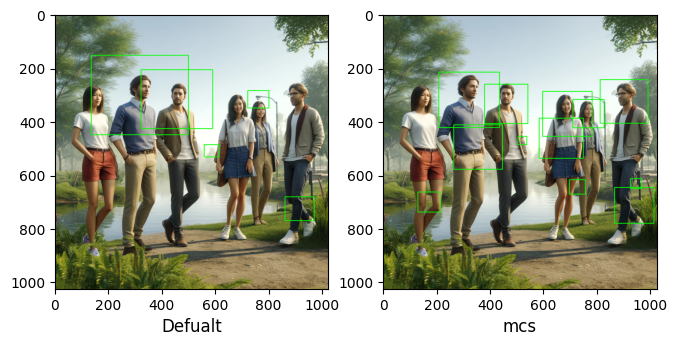

In [246]:
scaleFactor = 1.03

body_box_color = (0,255,0)

DefualtRGBImgPark = RGBImgPark.copy()
body_cascade = cv2.CascadeClassifier('models/haarcascade_upperbody.xml')
bodies = body_cascade.detectMultiScale(grayImgPark, scaleFactor, 5)   #had to change the scale factor to get a detection
for (x,y,w,h) in bodies:
     cv2.rectangle(DefualtRGBImgPark,(x,y),(x+w,y+h),body_box_color,2)


mcsRGBImgPark = RGBImgPark.copy()
body_cascade = cv2.CascadeClassifier('models/mcs_upperbody.xml')
bodies = body_cascade.detectMultiScale(grayImgPark, scaleFactor, 5)   #had to change the scale factor to get a detection
for (x,y,w,h) in bodies:
     cv2.rectangle(mcsRGBImgPark,(x,y),(x+w,y+h),body_box_color,2)


with plt.ioff():
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(DefualtRGBImgPark)
    ax.set_xlabel('Defualt', size=12)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(mcsRGBImgPark)
    ax.set_xlabel('mcs', size=12)
    
plt.show()

*Your assessment goes here:* 
<div style="color:lightblue"> The mcs upper body cascade seems to be able to find more of the upper bodies in the image than the defualt cascade (5 for the mcs, but only 2 for the defualt) given the same scale factor of 1.03, but both cascades are very prone to false positives, with the mcs having 8 and defualt having 3


### Critical assessment of detectors

It is now time to reflect on the usefulness of the Haar cascade detectors
* <div style="color:blue">Critically assess the usefulness of the detectors based on the experiments in this notebook. Can you generalize? What might be a compounding factor here?</div>

*Your assessment goes here:*<br>
<div style="color:lightblue">The ability for the detectors to detect faces is quite impressive with very few to no false positives, and the number of true positives is quite good, especially after messing around with the scale factor. <br>
On the other hand, the upperbody detection for both models is quite lackluster, giving many false positives, while the mcs model was able to detect 4 out of the 5 upperbodies, it cannot be used reliably. <br>
same can be said for the face detection, as there is still quite a few faces that have not been detected. <br>
factors that affect the models could be the complexity of the background, and the angle at whic the faces and bodies are in the photos, also the resolution could affect the accuracy

